Malignant vs Benign Cancer Image Classification

In [1]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import warnings
from PIL import Image
warnings.filterwarnings("ignore",category=FutureWarning)
import os
import random
from keras.preprocessing.image import load_img

In [2]:
IMAGE_SIZE = [224,224]

In [3]:
! pip install kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"sayansh001","key":"bb83f534024ea023f7468a775ff3e4f2"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

 98% 319M/325M [00:02<00:00, 112MB/s]
100% 325M/325M [00:02<00:00, 126MB/s]


In [5]:
!rm -rf datasets

In [6]:
! unzip /content/skin-cancer-malignant-vs-benign.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/train/benign/420.jpg  
  inflating: data/train/benign/421.jpg  
  inflating: data/train/benign/422.jpg  
  inflating: data/train/benign/423.jpg  
  inflating: data/train/benign/424.jpg  
  inflating: data/train/benign/425.jpg  
  inflating: data/train/benign/426.jpg  
  inflating: data/train/benign/429.jpg  
  inflating: data/train/benign/43.jpg  
  inflating: data/train/benign/430.jpg  
  inflating: data/train/benign/431.jpg  
  inflating: data/train/benign/432.jpg  
  inflating: data/train/benign/434.jpg  
  inflating: data/train/benign/435.jpg  
  inflating: data/train/benign/438.jpg  
  inflating: data/train/benign/439.jpg  
  inflating: data/train/benign/440.jpg  
  inflating: data/train/benign/441.jpg  
  inflating: data/train/benign/442.jpg  
  inflating: data/train/benign/443.jpg  
  inflating: data/train/benign/445.jpg  
  inflating: data/train/benign/446.jpg  
  inflating: data/train/benign/447.jpg  
  infla

In [7]:
train_path = "/content/train"
test_path = "/content/test"

In [8]:
IMAGE_SIZE=[224,224]

In [9]:
data = []
label = []
for class_name in os.listdir("/content/train"):
    for path in os.listdir("/content/train/"+class_name):
        if class_name=='benign':
            label.append(0)
        else:
            label.append(1)
        data.append(os.path.join("/content/train",class_name,path))
print(data[0],label[0])

/content/train/malignant/191.jpg 1


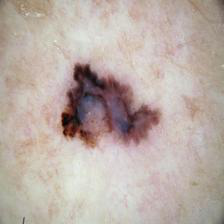

In [10]:
Image.open(data[0])

In [11]:
import pandas as pd
df = pd.DataFrame()
df['images'] = data
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,/content/train/benign/346.jpg,0
1,/content/train/malignant/650.jpg,1
2,/content/train/malignant/1207.jpg,1
3,/content/train/benign/1289.jpg,0
4,/content/train/benign/1001.jpg,0


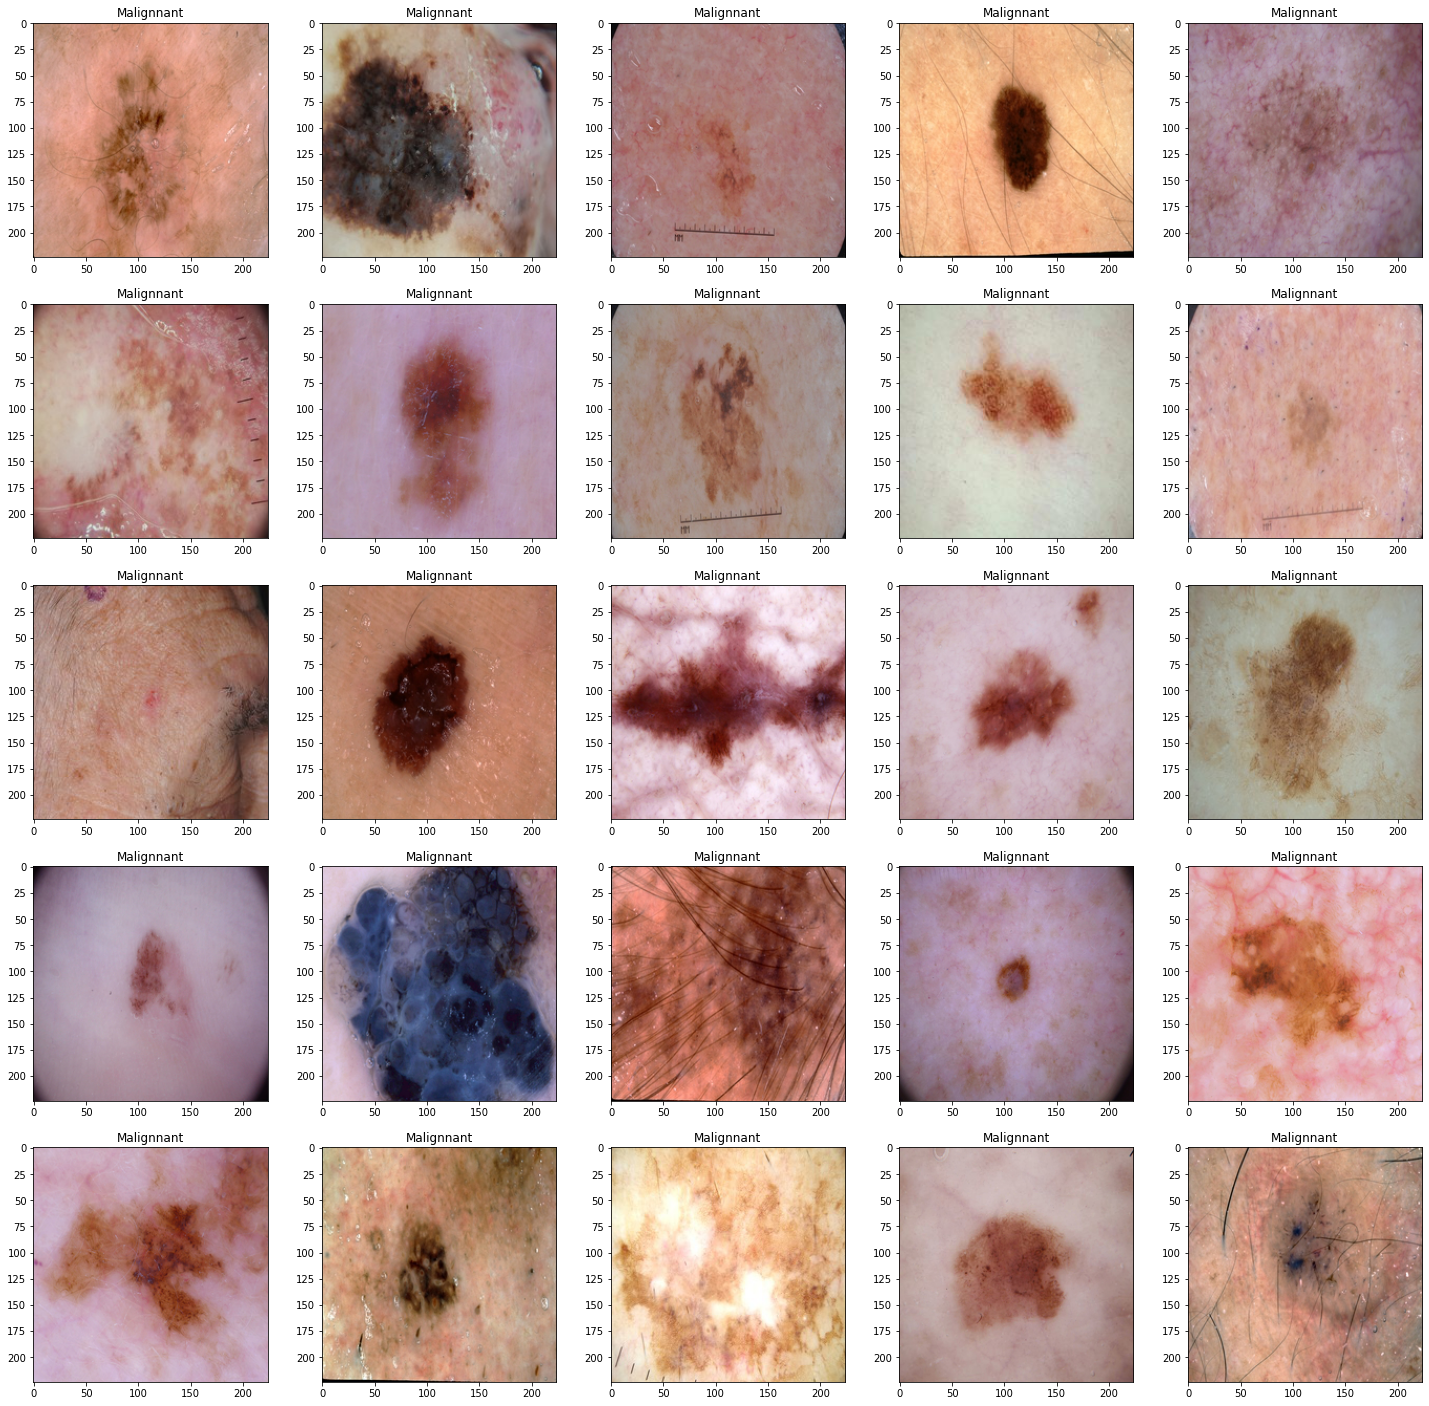

In [12]:
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']  #all the images of dogs will be stored in temp
start = random.randint(0,len(temp))  #this generates a random number between 0 and len(temp)
files = temp[start:start+25]         #in files we store the first 25 continuous images between the random number generated 
                                     #since temp is basically images of dogs from step 2
for index,file in enumerate(files):
  plt.subplot(5,5,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.imshow(img)
  plt.title('Malignnant')
  plt.axis()

input_shape = IMAGE_SIZE+[3] as it is RGB,

weights = 'imagenet' this signifies the weights are to be directly imported from the imagenet clsassification model

include_top = False as every model has different number of outputs so thats why we define include_top = False so that it doesnt take the original number of outputs from vgg16 model

In [13]:
vgg = VGG16(input_shape = IMAGE_SIZE+[3],weights='imagenet',include_top =False)

58900480/58889256 [==============================] - 0s 0us/step


this tells the colab not to train the layers again and to directly use the parameters that the model has learnt 

In [14]:
for layer in vgg.layers:
    layer.trainable = False

glob it is useful when we want to see how many folders are there in a directory

In [15]:
count=0
for class_name in os.listdir('/content/train'):
    count+=1
count

2

In [16]:
x = Flatten()(vgg.output)
prediction = Dense(count,activation='softmax')(x)
model = Model(inputs=vgg.input,outputs = prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Now why are we doing preprocessing?

When the model was actually being trained there were some preprocessing steps being followed.So to get similar results we need to ensure we do the exact same preprocessing steps

In [18]:
train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range=40,
    width_shift_range = 0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range=40,
    width_shift_range = 0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

In [19]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 2637 images belonging to 2 classes.


In [20]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 660 images belonging to 2 classes.


In [21]:
'''from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)'''

'from datetime import datetime\nfrom keras.callbacks import ModelCheckpoint\n\n\n\ncheckpoint = ModelCheckpoint(filepath=\'mymodel.h5\', \n                               verbose=2, save_best_only=True)\n\ncallbacks = [checkpoint]\n\nstart = datetime.now()\n\nmodel_history=model.fit(\n  train_set,\n  validation_data=test_set,\n  epochs=10,\n  steps_per_epoch=5,\n  validation_steps=32,\n    callbacks=callbacks ,verbose=2)\n\n\nduration = datetime.now() - start\nprint("Training completed in time: ", duration)'

In [56]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
5/5 - 15s - loss: 2.7163 - accuracy: 0.7875 - val_loss: 6.1240 - val_accuracy: 0.7152 - 15s/epoch - 3s/step
Epoch 2/10
5/5 - 3s - loss: 6.0069 - accuracy: 0.6625 - 3s/epoch - 536ms/step
Epoch 3/10
5/5 - 3s - loss: 4.3449 - accuracy: 0.7500 - 3s/epoch - 527ms/step
Epoch 4/10
5/5 - 3s - loss: 2.7089 - accuracy: 0.8438 - 3s/epoch - 527ms/step
Epoch 5/10
5/5 - 3s - loss: 3.6597 - accuracy: 0.7812 - 3s/epoch - 525ms/step
Epoch 6/10
5/5 - 3s - loss: 3.5714 - accuracy: 0.7750 - 3s/epoch - 526ms/step
Epoch 7/10
5/5 - 3s - loss: 5.2408 - accuracy: 0.7875 - 3s/epoch - 530ms/step
Epoch 8/10
5/5 - 3s - loss: 3.2051 - accuracy: 0.8375 - 3s/epoch - 521ms/step
Epoch 9/10
5/5 - 3s - loss: 3.5200 - accuracy: 0.8438 - 3s/epoch - 524ms/step
Epoch 10/10
5/5 - 3s - loss: 4.8753 - accuracy: 0.8000 - 3s/epoch - 523ms/step


In [23]:
from tensorflow.keras.models import load_model
model.save('cancer_vgg16.h5')

Predictions

In [24]:
from keras.preprocessing import image
from PIL import Image

In [38]:
train_set.class_indices

{'benign': 0, 'malignant': 1}

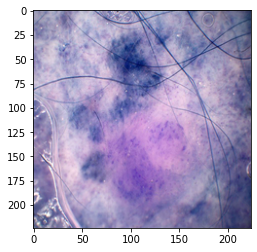

In [62]:
import cv2 
img=cv2.imread(r"/content/test/malignant/1005.jpg")
plt.imshow(img)
plt.show()

In [58]:
image_1=Image.open(r'/content/test/malignant/1005.jpg')
categories=['benign','malignant']
new_image=image_1.resize((224, 224))
Pred_image=image.img_to_array(new_image)
Pred_image=np.expand_dims(Pred_image, axis=0)
result=model.predict(Pred_image)
result=result.reshape(-1)
max=result[0]
pred=0
for i in range(0, len(result)):
    if(result[i]>max):
        pred=i
        max=result[i]
print(pred)
print(categories[pred])

1
malignant


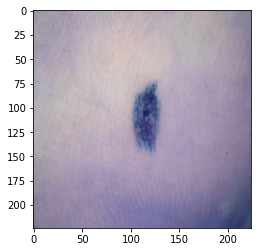

In [64]:
import cv2 
img=cv2.imread(r"/content/test/benign/1061.jpg")
plt.imshow(img)
plt.show()

In [65]:
image_2=Image.open(r'/content/test/benign/1061.jpg')
categories=['benign','malignant']
new_image_2=image_2.resize((224, 224))
Pred_image2=image.img_to_array(new_image_2)
Pred_image2=np.expand_dims(Pred_image2, axis=0)
result=model.predict(Pred_image2)
result=result.reshape(-1)
max=result[0]
pred=0
for i in range(0, len(result)):
    if(result[i]>max):
        pred=i
        max=result[i]
print(pred)
print(categories[pred])

0
benign
